# Lab: Principal Component Analysis (PCA)

In this exercise, you will use principal component analysis (PCA) to perform
dimensionality reduction. You will ﬁrst experiment with a simple 2D
dataset, and then use it on a bigger dataset of 5000 face image dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 

### 2D Data

To help you understand how PCA works, you will ﬁrst start with a 2D dataset
which has one direction of large variation and one of smaller variation. 
You will visualize what happens when you use PCA to reduce th data from 2D to 1D. 

Load matrix X from matlab file "ex7data1.mat" and assign it to X3. 

Print the shape of X3.

In [2]:

X3 = loadmat('ex7data1.mat')['X']

### Plotting the data


Plot the data and get a figure similar to Fig.1. 

<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1** : **2D data** </center></caption>



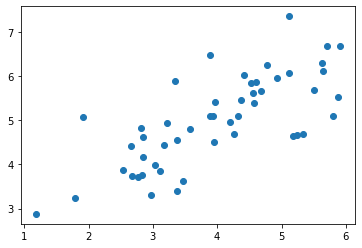

In [4]:
plt.scatter(X3[:,0], X3[:,1])

### Implementing PCA


Before using PCA, it is important to ﬁrst normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In [5]:
def featureNormalize(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma

PCA consists of two steps: First, compute the covariance matrix S of the data:

$S = \frac{1}{m} X^TX$

Then, use SVD function to compute the eigenvectors U(1), U(2), ...U(n), that are the principal components of variation in the data.


In [6]:
def pca(X):
    """
    Computes eigenvectors of the covariance matrix of X
    """
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    # U contain the principal components;
    #S contain a diagonal matrix of singular values
    
    U,S,V = svd(sigma)
    
    return U,S,V

Apply feature normalization and pca for X3. 

In [7]:
from numpy.linalg import svd
X_norm,mu,std = featureNormalize(X3)
U,S = pca(X_norm)[0:2]

### Visualizing PCA

 Plot the corresponding principal components found. 

(2.0, 8.0)

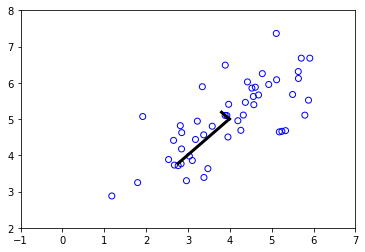

In [8]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+S[0]*U[:,0].T)[0]],[mu[1],(mu+S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+S[1]*U[:,1].T)[0]],[mu[1],(mu+S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [9]:
#Print the top principal component (eigenvector) found
#you should expect to see an output of about [-0.707 -0.707]. 

print('Top principal component: ', U[:,0])

Top principal component:  [-0.70710678 -0.70710678]


### Dimensionality reduction with PCA

After computing the principal components, you can use them to reduce the
feature dimension of your dataset by projecting each example onto a lower
dimensional space, x (i) → z (i) (e.g., projecting the data from 2D to 1D). 

Now you will use the eigenvectors returned by PCA and project the 2D dataset into a 1D space.

In practice, if you were using a learning algorithm such as linear regression
or perhaps neural networks, you could now use the projected data instead
of the original data. By using the projected data, you can train your model
faster as there are less dimensions in the input.

In [10]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z

In [11]:
# Project the data onto K=1 dimension
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578515


### Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space (Z), you can approximately recover the data (X_rec) by projecting them back onto the original high dimensional space.

In [12]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

In [13]:
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


### Visualizing the projections

The projection retains only the information in the direction given by U(1).

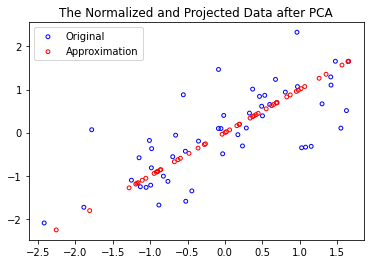

In [14]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

### Face Image Dataset

In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. File ex7faces.mat, contains a dataset X of face images, each 32 × 32 in grayscale. Each row of X corresponds to one face image (a row vector of length 1024). 


Load matrix X from matlab file "ex7data1.mat" and assign it to X4. 
Print the shape of X4.

In [15]:
X4 = loadmat('ex7faces.mat')['X']


### Visualizing the dataset

Load and visualize the ﬁrst 100 of these face images (Fig.2). 

<img src="images/f3.png" style="width:450px;height:450px;">
<caption><center> **Fig. 2** : **Face data** </center></caption>

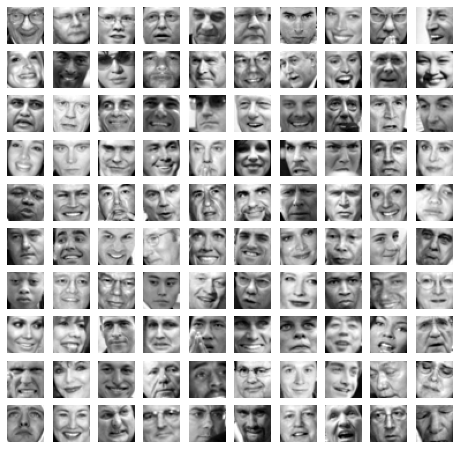

In [16]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

### PCA on face

To run PCA on the face dataset, you need ﬁrst to normalize the dataset as before.  

After running PCA, you will obtain the principal components of the dataset. Each principal component in U (each row) is a vector of length n (where for the face dataset,
n = 1024). We can visualize these principal components by reshaping each of them into a 32 × 32 matrix that corresponds to the pixels in the original dataset. 
The code below displays the ﬁrst 36 principal components that describe the largest variations. 
If you want, you can also change the code to display more principal components to see how
they capture more and more details.

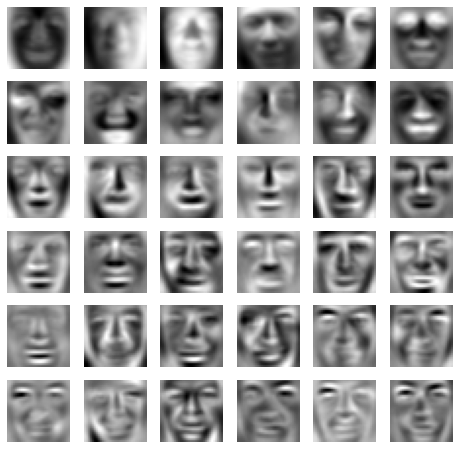

In [17]:
X_norm2 = featureNormalize(X4)[0]

# Run PCA
U2 = pca(X_norm2)[0]

#Visualize the top 36 eigenvectors found
U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

### Dimensionality Reduction

You can use the computed principal components, to reduce the dimension of the face dataset. 

Project the data into smaller dimension matrix  Z2 (e.g., 100 dimensions). 
Print the dimension of Z2. 

This allows you to use your learning algorithm with a smaller input size instead of the original 1024 dimensions. This can help speed up your learning algorithm.


In [18]:
K2 = 100
Z2 = projectData(X_norm2, U2, K2)


Recover the data and visualize the reconstructed data to get something similar to Fig. 3. 

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the ﬁne details are lost. This is a remarkable reduction (more than 10×) in the dataset size that can help speed up your learning algorithm signiﬁcantly.
For example, if you were training a neural network to perform person recognition (gven a face image, predict the identitfy of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.


<img src="images/f2.png" style="width:450px;height:450px;">
<caption><center> **Fig. 3** : **Training data** </center></caption>

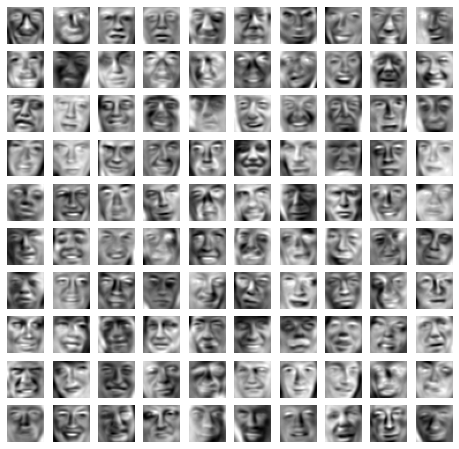

In [19]:
# Data reconstruction
X_rec2  = recoverData(Z2, U2, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")